# Chemometrics
<br>
**Julien Wist / 2017 / Universidad del Valle**
<br>
**Andrés Bernal / 2017 / ???**

An up-to-date version of this notebook can be found here: https://github.com/jwist/chemometrics/

In [51]:
options(repr.plot.width=4, repr.plot.height=4)

In [52]:
# we load a few packages
library(ggplot2)
library(corrplot)
library(reshape2)
library(caret)
library(MASS) # for LDA
library(klaR) # for pls
library(pls)
library(e1071)# for pls
library(pROC) # for pls
library(vegan)
require(scales)
require(gridExtra);

## let's look at GC-MS data

we load data of 7 compounds:
- caffein
- vitamin E
- sitosterol
- hexadecanoic acid
- furanmethanol
- tocopherol

In [59]:
rm(list=ls(all=TRUE))

load(url('https://github.com/jwist/chemometrics/raw/master/datasets/coffeeMulti.rda'))
d <- coffeeMulti$gc                       # select GCMS data
#d <- data.frame("x"=coffeeMulti$gc[5:11],"country"=coffeeMulti$gc$country) 

#par(mfrow=c(3,3))
# first we have a look to the data... this is rule number one!

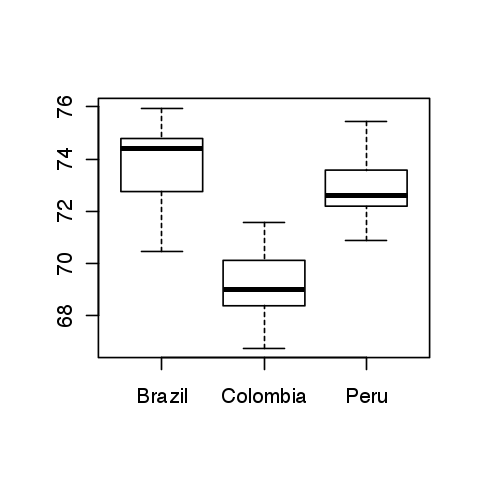

In [60]:
d <- data.frame("x"=coffeeMulti$gc$caffeine,"country"=coffeeMulti$gc$country) #31.87
boxplot(tapply(d$x,d$country,function(x) x))


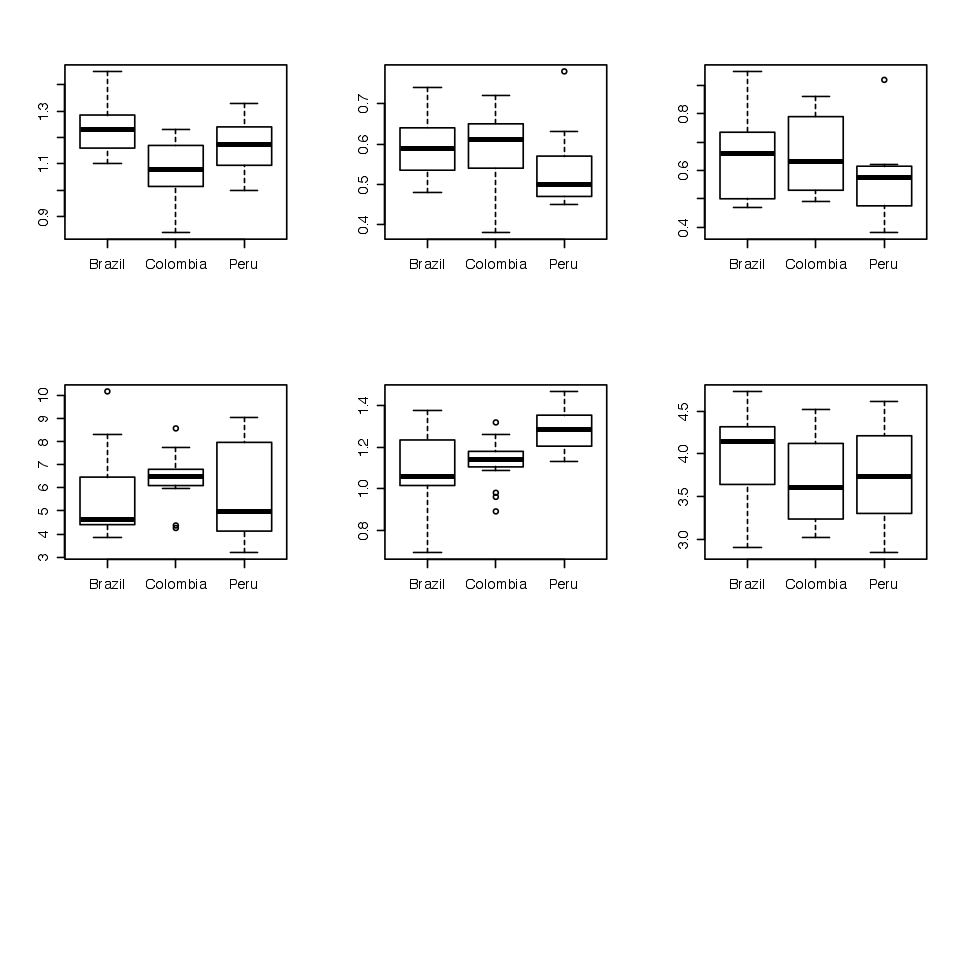

In [61]:
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(3,3))
d <- data.frame("x"=coffeeMulti$gc$vitE,"country"=coffeeMulti$gc$country) #6.14 alias a-tocopherol
boxplot(tapply(d$x,d$country,function(x) x))
d <- data.frame("x"=coffeeMulti$gc$stigmasterol,"country"=coffeeMulti$gc$country) #1.21
boxplot(tapply(d$x,d$country,function(x) x))
d <- data.frame("x"=coffeeMulti$gc$sitosterol,"country"=coffeeMulti$gc$country) #0.93
boxplot(tapply(d$x,d$country,function(x) x))
d <- data.frame("x"=coffeeMulti$gc$hexadecanoicAcid,"country"=coffeeMulti$gc$country) #0.584
boxplot(tapply(d$x,d$country,function(x) x))
d <- data.frame("x"=coffeeMulti$gc$furanmethanol,"country"=coffeeMulti$gc$country) #4.76
boxplot(tapply(d$x,d$country,function(x) x))
d <- data.frame("x"=coffeeMulti$gc$tocoferol,"country"=coffeeMulti$gc$country) #1.14
boxplot(tapply(d$x,d$country,function(x) x))

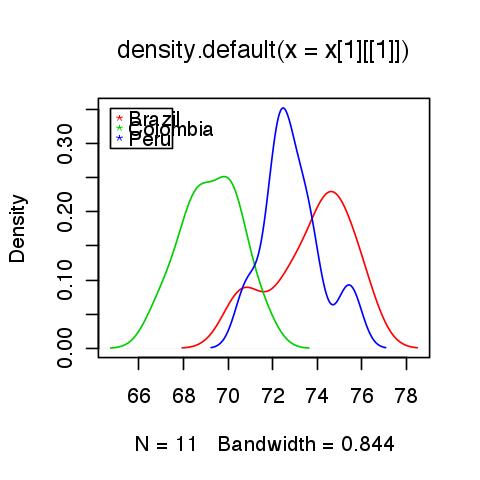

In [62]:
options(repr.plot.width=4, repr.plot.height=4)
# here we plot the distribution for each class
d <- data.frame("x"=coffeeMulti$gc$caffeine,"country"=coffeeMulti$gc$country) #31.87
x <- tapply(d$x,d$country,function(x) x)
xlims <- range(unlist(tapply(d$x,d$country,function(x) unlist(range(density(x)$x)))))
ylims <- range(unlist(tapply(d$x,d$country,function(x) unlist(range(density(x)$y)))))
plot(density(x[1][[1]]),type='l', xlim=xlims, ylim=ylims, col=2)
lines(density(x[2][[1]]), col=3)
lines(density(x[3][[1]]), col=4)
legend(min(xlims),max(ylims),levels(d$country), col=2:4, pch="*")
